In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [37]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [38]:
X_train.shape

(60000, 28, 28)

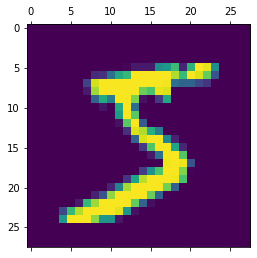

In [39]:
plt.matshow(X_train[0])

In [15]:
y_train[0]

5

In [42]:
# range is from 0-255 
#scaling the values and highest value is 255
X_train = X_train /255
X_test = X_test /255

In [43]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
# reshape will be used to flatten the data set
# current shape (60000, 28, 28)
# wanted shape (6000, (28*28) )
X_train_flat =X_train.reshape(len(X_train),28*28)
X_test_flat =X_test.reshape(len(X_test),28*28)

In [45]:
X_test_flat.shape

(10000, 784)

In [46]:
#shallow nueral network output 10 nodes input 784 and its a dense one no hiden layyers
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss ="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.4851 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 1s 412us/step - loss: 0.3060 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 1s 414us/step - loss: 0.2853 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 414us/step - loss: 0.2748 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 1s 415us/step - loss: 0.2681 - accuracy: 0.9260


In [47]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 347us/step - loss: 0.2672 - accuracy: 0.9270


[0.2671647071838379, 0.9269999861717224]

In [49]:
# adding a hidden layer 
model1= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model1.compile(
    optimizer="adam",
    loss ="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model1.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 552us/step - loss: 0.2927 - accuracy: 0.9186
Epoch 2/5
1875/1875 [==============================] - 1s 505us/step - loss: 0.1382 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 1s 505us/step - loss: 0.1009 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.0778 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 1s 484us/step - loss: 0.0622 - accuracy: 0.9809


In [50]:
model1.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 370us/step - loss: 0.0828 - accuracy: 0.9743


[0.08277539908885956, 0.9743000268936157]

Text(69.0, 0.5, 'Truth')

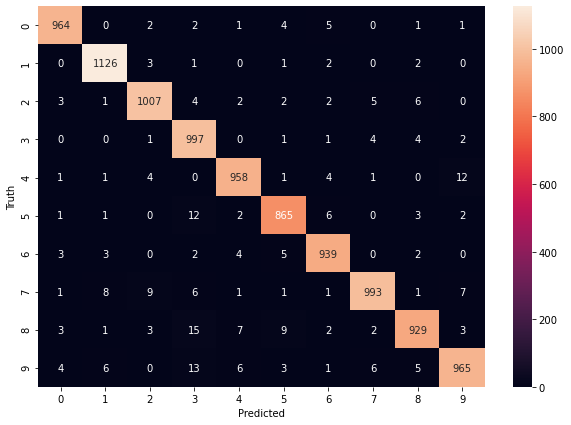

In [52]:
import seaborn as sns
y_predicted = model1.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
con_matrix = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [54]:
# adding a flatten layer & hidden layer
# Keras provide a feature that a layer can be used to flatten the data set
model2= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model2.compile(
    optimizer="adam",
    loss ="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.2930 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 1s 487us/step - loss: 0.1289 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 1s 482us/step - loss: 0.0939 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 1s 484us/step - loss: 0.0731 - accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.0600 - accuracy: 0.9815
